In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

# https://stackoverflow.com/questions/40887753/display-matrix-values-and-colormap

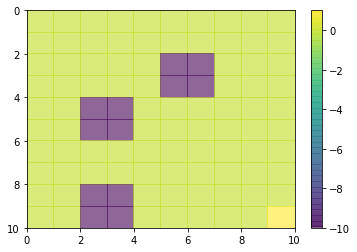

In [2]:
#Q1

ReFunc1 =[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,-10,-10,0,0,0],[0,0,0,0,0,-10,-10,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,0],[0,0,-10,-10,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,0],[0,0,-10,-10,0,0,0,0,0,1]]

ReFunc2 =[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,-100,-100,-100,0,0,0],
          [0,0,0,0,-100,0,-100,0,0,0],[0,0,0,0,-100,0,-100,-100,-100,0],
          [0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,-100,0,0,0,-100,0],
          [0,0,0,0,-100,0,0,0,-100,0],[0,0,0,0,0,0,-100,-100,-100,0],
          [0,0,0,0,0,0,-100,0,0,0],[0,0,0,0,0,0,0,0,0,10]]
# ReFunc2 = np.rot90(ReFunc2)
# ReFunc1 = np.asmatrix(ReFunc1)
plt.pcolor(ReFunc1, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()


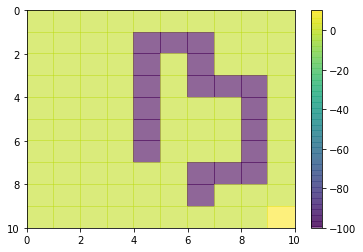

In [3]:
plt.pcolor(ReFunc2, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()

In [4]:
#Q2

values = [[0 for i in range(10)] for i in range(10)]
moves = ['L', 'R', 'U', 'D']

In [5]:
class environment():
    def __init__(self,rewards,  epsilon= 0.01, w = 0.1):
        self.values = [[0 for i in range(10)] for i in range(10)]
        self.moves = ['L', 'R', 'U', 'D']
        self.rewards = rewards
        self.delta = sys.maxsize 
        self.epsilon = epsilon
        self.policies = [[0 for i in range(10)] for i in range(10)]
        self.probabilities_matrix = [[[] for i in range(10)] for i in range(10)]
        self.w = w
    def reset():
        self.values = [[0 for i in range(10)] for i in range(10)]
        self.policies = [[0 for i in range(10)] for i in range(10)]

    def estimation(self,states):
        while self.delta > self.epsilon:
            self.delta = 0
            for x in range(len(states)):
                for y in range(len(states[x])):
#                     value_temp = self.values[x][y]
                    maxn = []
                    for move in self.moves:
                        maxn.append(self.eval_direction(x,y,move, self.w,0.8))
                    maxnumb = max(maxn)                    
                    self.delta = max(self.delta, abs(self.values[x][y] - maxnumb))
                    self.values[x][y] = maxnumb
                    


    def estimation_policy(self,states):
        
        for x in range(len(states)):
            for y in range(len(states[x])):
                maxn = []
                directions = [(x-1,y),(x+1,y),(x,y+1),(x,y-1)]

                for i, move in enumerate(self.moves):
                    maxn.append([self.eval_direction(x,y,move, self.w,0.8), move])
                maxnumb = max(maxn, key = lambda x :x[0])    
                self.policies[x][y] = maxnumb[1]    

        
    def eval_direction(self,x,y,direction,w ,discount):
        # probabilities indexed by left, right, up, down
        probabilities = [w/4,w/4,w/4,w/4]
        # when encoutering edge cases, direction off the grid will be replaced with staying in same block
        directions = [(x-1,y),(x+1,y),(x,y+1),(x,y-1)]
        sumn = []
        if x > 0 and x <9 and y > 0 and y < 9:


            if direction == 'L':
                probabilities[0] = 1-w+w/4
            elif direction == 'R':
                probabilities[1] = 1-w+w/4
            elif direction == 'U':
                probabilities[2] = 1-w+w/4
            elif direction == 'D':
                probabilities[3] = 1-w+w/4


        elif (x == 0 and y == 0) or (x == 0 and y == 9) or (x == 9 and y == 0) or (x == 9 and y == 9):
            if (x == 0 and y == 0):
                directions[0] = (x,y)
                directions[3] = (x,y)
                if direction == 'L' or direction == 'D':
                    probabilities[0] = 1-w+w/4+w/4
                    probabilities[3] = 0
                elif direction == 'R':
                    probabilities[1] = 1-w+w/4
                elif direction == 'U':
                    probabilities[2] = 1-w+w/4
            elif (x == 0 and y == 9):
                directions[0] = (x,y)
                directions[2] = (x,y)
                if direction == 'L' or direction == 'U':
                    probabilities[0] = 1-w+w/4+w/4
                    probabilities[2] = 0
                elif direction == 'R':
                    probabilities[1] = 1-w+w/4
                elif direction == 'D':
                    probabilities[3] = 1-w+w/4
            elif  (x == 9 and y == 0):
                directions[1] = (x,y)
                directions[3] = (x,y)
                if direction == 'R' or direction == 'D':
                    probabilities[1] = 1-w+w/4+w/4
                    probabilities[3] = 0
                elif direction == 'L':
                    probabilities[0] = 1-w+w/4
                elif direction == 'U':
                    probabilities[2] = 1-w+w/4
            elif  (x == 9 and y == 9):            
                directions[1] = (x,y)
                directions[2] = (x,y)
                if direction == 'R' or direction == 'U':
                    probabilities[1] = 1-w+w/4+w/4
                    probabilities[2] = 0
                elif direction == 'L':
                    probabilities[0] = 1-w+w/4
                elif direction == 'D':
                    probabilities[3] = 1-w+w/4

        else:
            if direction == 'L':
                probabilities[0] = 1-w+w/4
            elif direction == 'R': 
                probabilities[1] = 1-w+w/4
            elif direction == 'U':
                probabilities[2] = 1-w+w/4
            elif direction == 'D':
                probabilities[3] = 1-w+w/4 


            if x-1 < 0:
                directions[0] = (x,y)
            elif x+1 > 9:
                directions[1] = (x,y)
            elif y+1 > 9:
                directions[2] = (x,y)
            elif y-1 < 0:
                directions[3] = (x,y)
                
        self.probabilities_matrix[x][y] = probabilities
        
        for x, direction in enumerate(directions): 
#             print(x,direction)
            sumn.append(probabilities[x] * (self.rewards[direction[0]][direction[1]]+ discount*self.values[direction[0]][direction[1]]))


        return sum(sumn)    
        

        
        
        
        


In [6]:

def plot_optimal_policy(policy, epsilon = 0.01, w = 0.1):
    q2 = environment(policy, epsilon, w)
    q2.estimation(values)
    q2.values =  np.rot90(np.rot90(np.rot90(q2.values)))
    q2.rewards = np.rot90(np.rot90(np.rot90(q2.rewards)))
    # q2.values=[x[::-1] for x in q2.values] 
    q2.estimation_policy(values)
    # print(q2.policies)
    # print(q2.values)

    fig, ax = plt.subplots()

    min_val, max_val = 0, 10
    
    for i in range(10):
        for j in range(10):
            if q2.policies[i][j] == 'L':
                c = '⇧'
            elif q2.policies[i][j] == 'R':
                c = '⇩'
            elif q2.policies[i][j] == 'U':
                c = '⇨'
            elif q2.policies[i][j] == 'D':
                c = '⇦'
            ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')
# plt.gca().invert_yaxis()

# plt.matshow(q2.values)
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.grid()
    xticks = range(max_val+1)
    plt.xticks(xticks)
    plt.yticks(xticks, xticks[::-1])
    ax.xaxis.tick_top()



In [7]:
def plot_values(policy, epsilon = 0.01, w = 0.1 , roundNumb = 3):
    q2 = environment(policy,epsilon ,w )
    q2.estimation(values)
    q2.values =  np.rot90(np.rot90(np.rot90(q2.values)))
    q2.rewards = np.rot90(np.rot90(np.rot90(q2.rewards)))
    # q2.values=[x[::-1] for x in q2.values] 
    q2.estimation_policy(values)
    # print(q2.policies)
    # print(q2.values)

    fig, ax = plt.subplots()

    min_val, max_val = 0, 10

    min_val, max_val = 0, 10
    for i in range(10):
        for j in range(10):
            c = round(q2.values[i][j], roundNumb)
            ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)

    ax.grid()
    xticks = range(max_val+1)
    plt.xticks(xticks)
    plt.yticks(xticks, xticks[::-1])
    ax.xaxis.tick_top()
def plot_heatmap(policy, epsilon =0.01, w=0.1 , alphaA = 0.9):
    q2 = environment(policy, epsilon ,w )
    q2.estimation(values)
    #ax.xaxis.tick_top()
    plt.pcolor(q2.values, alpha= alphaA )
    plt.gca().invert_yaxis()
    plt.colorbar()
   

# Part 4: Inverse Reinforcement learning (IRL)


In [173]:
from cvxopt import matrix, solvers
import heapq
solvers.options['show_progress'] = False

np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

In [199]:
def get_probability_matrices(expert_policy,probabilities,n_states):
    optimal_probabilty_matrix = np.zeros((n_states,n_states))
    probabilty_matrix = np.zeros((n_states,n_states))
    
    #iterate over every state in the 10X10 expert_policy
    
    # ?BOARD STATES? i think it looks like this.
    # # # # # # # # # #
    # 9 19 .... 89 99 #
    # . .. .... 88 98 #
    # . .. .... .. .. #
    # 2 12 .... 82 92 #
    # 1 11 .... 81 91 #
    # 0 10 .... 80 90 #
    # # # # # # # # # #
    
    for x, policy_row in enumerate(expert_policy):
        for y, policy_cell in enumerate(policy_row):
            #calculate state when moving in a direction. left -> move
            
            left_state = 10*x+y - 10
            right_state = 10*x+y + 10
            up_state = 10*x+y + 1
            down_state = 10*x+y - 1
            #used to sum probabilties if they try to go off of the board to current state
            cur_state_prob = 0
            #check to see if state tries to go off board
            if (left_state < 0):
                #add probability to current state if it does
                cur_state_prob += probabilities[x][y][0]
                #add 100% probability for expert policy state transition when trying to go off of board
                if policy_cell == 'L':
                    optimal_probabilty_matrix[10*x+y][10*x+y] = 1
            else:
                #if not trying to go off of board, add regular probability from base probabilities 
                #(from above class by shelly)
                probabilty_matrix[10*x+y][left_state] = probabilities[x][y][0]
                #add 100% probability for expert policy state transition
                if policy_cell == 'L':
                    optimal_probabilty_matrix[10*x+y][left_state] = 1
            
            if (right_state > 99):
                cur_state_prob += probabilities[x][y][1]
                if policy_cell == 'R':
                    optimal_probabilty_matrix[10*x+y][10*x+y] = 1
            else:
                probabilty_matrix[10*x+y][right_state] = probabilities[x][y][1]
                if policy_cell == 'R':
                    optimal_probabilty_matrix[10*x+y][right_state] = 1
            
            if (up_state % 10 < x or up_state == 100):
                cur_state_prob += probabilities[x][y][2]
                if policy_cell == 'U':
                    optimal_probabilty_matrix[10*x+y][10*x+y] = 1
            else:
                probabilty_matrix[10*x+y][up_state] = probabilities[x][y][2]
                if policy_cell == 'U':
                    optimal_probabilty_matrix[10*x+y][up_state] = 1
            
            if (down_state % 10 > x or down_state == -1):
                cur_state_prob += probabilities[x][y][3]
                if policy_cell == 'D':
                    optimal_probabilty_matrix[10*x+y][10*x+y] = 1
            else:
                probabilty_matrix[10*x+y][down_state] = probabilities[x][y][3]
                if policy_cell == 'D':
                    optimal_probabilty_matrix[10*x+y][down_state] = 1
            
            #add probability of going back to current state (from trying to go off of the board)
            probabilty_matrix[10*x+y][10*x+y] = cur_state_prob
    
#     print(probabilities)
#     print(expert_policy)
#     print(optimal_probabilty_matrix)
#     print(probabilty_matrix)
    
    return optimal_probabilty_matrix, probabilty_matrix
        

In [214]:
def learn_reward(expert_policy,lamb,discount,probabilities_matrix,R_max):
    n_states = 100
    # maximize   c^T * x
    # S.T.       D * x < b
    
    c = matrix(np.concatenate((np.ones(n_states),-lamb * np.ones(n_states),np.zeros(n_states)),axis=0))
#     print(c.size)
#     print(c)
    
#     sort_probabilities = np.sort(probabilities_matrix,axis=2)
    P_a1, P_a = get_probability_matrices(expert_policy,probabilities_matrix,n_states)
#     print(P_a1.shape)
#     print(P_a.shape)
    
    P_a_term = -(np.matmul((P_a1-P_a),np.linalg.inv(np.identity(n_states)-discount*P_a1)))
#     print(P_a_term)
    
    rows_1 = np.concatenate((np.identity(n_states),np.zeros((n_states,n_states)),P_a_term),axis=1)
    rows_2 = np.concatenate((np.zeros((n_states,n_states)),np.zeros((n_states,n_states)),P_a_term),axis=1)
    rows_3 = np.concatenate((np.zeros((n_states,n_states)),-np.identity(n_states),np.identity(n_states)),axis=1)
    rows_4 = np.concatenate((np.zeros((n_states,n_states)),-np.identity(n_states),-np.identity(n_states)),axis=1)
    rows_5 = np.concatenate((np.zeros((n_states,n_states)),np.zeros((n_states,n_states)),np.identity(n_states)),axis=1)
    rows_6 = np.concatenate((np.zeros((n_states,n_states)),np.zeros((n_states,n_states)),-np.identity(n_states)),axis=1)
#     print(rows_1.shape)
#     print(rows_2.shape)
#     print(rows_3.shape)
#     print(rows_4.shape)
#     print(rows_5.shape)
#     print(rows_6.shape)
    
    D = matrix(np.concatenate((rows_1,rows_2,rows_3,rows_4,rows_5,rows_6),axis=0))
    
    b = matrix(np.concatenate((np.zeros(4*n_states),R_max*np.ones(2*n_states)),axis=0))
    
#     print(c.size)
#     print(D.size)
#     print(b.size)

    sol = solvers.lp(c, D, b)

    new_reward = np.rot90(np.array(sol['x'])[-n_states:].reshape(10,10))
#     print(new_reward.shape)

    return new_reward

In [176]:
def compute_accuracy(expert_policy,learned_policy,states):
    acc_sum = 0
    for x_row, y_row in zip(expert_policy, learned_policy):
        for x_cell, y_cell in zip(x_row, y_row):
            acc_sum += np.sum(x_cell==y_cell)
#     print(acc_sum)
    return acc_sum / states

In [270]:
def find_best_reward(orig_reward,lambdas,discount_val):
    accuracies = []
    R_max = np.max(orig_reward)

    q10_25 = environment(orig_reward)
    q10_25.estimation(values)
    q10_25.values =  np.rot90(np.rot90(np.rot90(q10_25.values)))
    q10_25.rewards = np.rot90(np.rot90(np.rot90(q10_25.rewards)))
    q10_25.estimation_policy(values)
    expert_policy = q10_25.policies

    max_accuracy = 0
    max_lambda = 0
    best_reward = orig_reward

    for lamb in lambdas:
        new_reward = learn_reward(expert_policy,lamb,discount_val,q10_25.probabilities_matrix,R_max)

        q10_25_new = environment(new_reward)
        q10_25_new.estimation(values)
        q10_25_new.values =  np.rot90(np.rot90(np.rot90(q10_25_new.values)))
        q10_25_new.rewards = np.rot90(np.rot90(np.rot90(q10_25_new.rewards)))
        q10_25_new.estimation_policy(values)
        learned_policy = q10_25_new.policies

        accuracy = compute_accuracy(expert_policy,learned_policy,grid_states)

        accuracies.append(accuracy)

        if(accuracy > max_accuracy):
            best_reward = new_reward
            max_accuracy = accuracy
            max_lambda = lamb
    
    print('Found closest reward')
    return max_lambda, accuracies, best_reward

In [320]:
# ReFunc_Test =[[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],
#               [0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1]]

#### Q10

In [ ]:
#answered in doc

#### Q11

In [321]:
orig_reward = ReFunc1
discount_val = 0.8
lambdas = np.linspace(.01,5,500)
max_lambda, accuracies, best_reward = find_best_reward(orig_reward,lambdas,discount_val)

Found closest reward


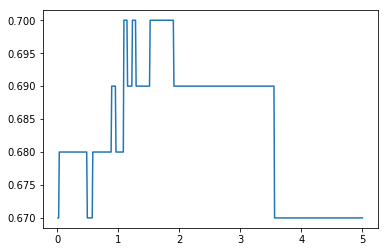

In [322]:
plt.plot(lambdas,accuracies) 
plt.show()

#### Q12

In [323]:
print(max_lambda)

1.09


In [324]:
# print(best_reward)

#### Q13

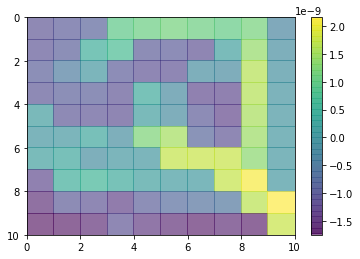

In [325]:
plt.pcolor(best_reward, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()

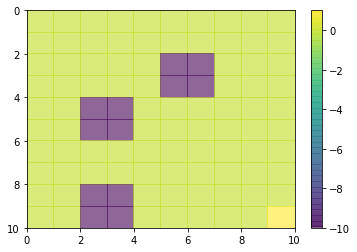

In [326]:
plt.pcolor(orig_reward, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()

#### Q14

In [327]:
#show values and heatmaps

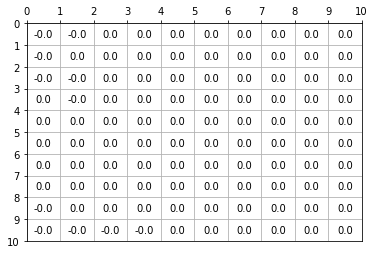

In [328]:
plot_values(best_reward)

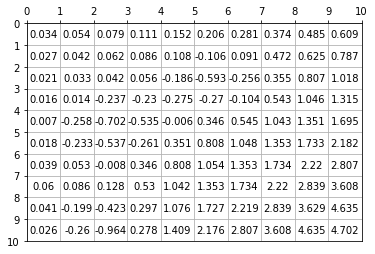

In [329]:
plot_values(orig_reward)

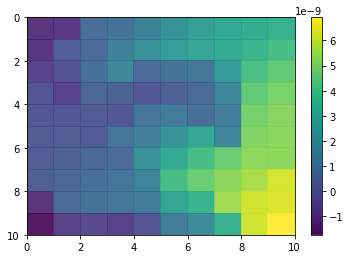

In [330]:
plot_heatmap(best_reward)

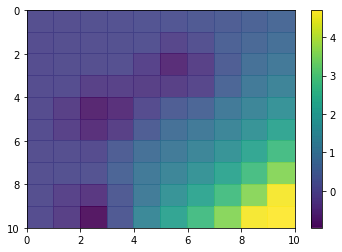

In [331]:
plot_heatmap(orig_reward)

#### Q15

In [332]:
#compare heatmaps answered in doc

#### Q16

In [333]:
#show best policies

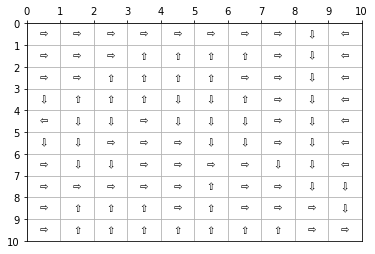

In [334]:
plot_optimal_policy(best_reward)

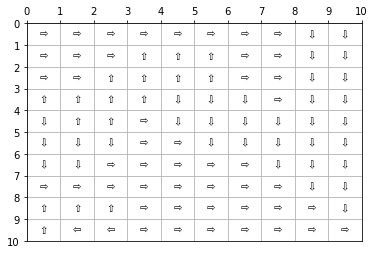

In [335]:
plot_optimal_policy(orig_reward)

#### Q17


In [ ]:
#similarities/differences of plots answered in doc

#### Q18


In [288]:
orig_reward = ReFunc2
discount_val = 0.8
lambdas = np.linspace(.01,5,500)
max_lambda, accuracies, best_reward = find_best_reward(orig_reward,lambdas,discount_val)

Found closest reward


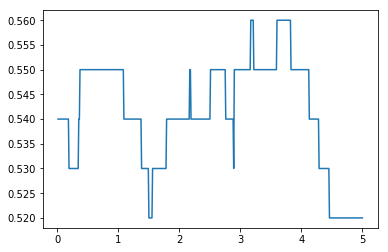

In [289]:
plt.plot(lambdas,accuracies) 
plt.show()

#### Q19

In [290]:
print(max_lambda)

3.17


In [291]:
# print(best_reward)

#### Q20

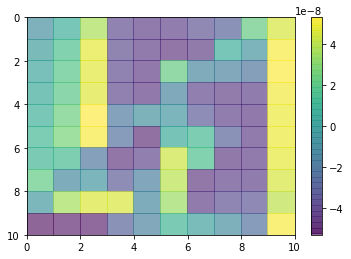

In [292]:
plt.pcolor(best_reward, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()

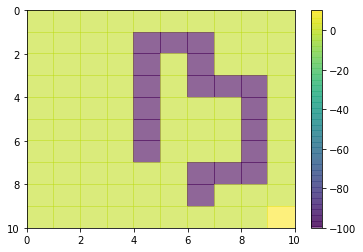

In [293]:
plt.pcolor(orig_reward, alpha = 0.6)
plt.gca().invert_yaxis()
plt.colorbar()

#### Q21

In [294]:
#show values and heatmaps

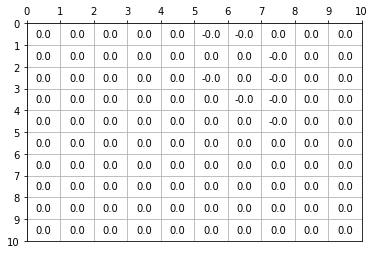

In [295]:
plot_values(best_reward)

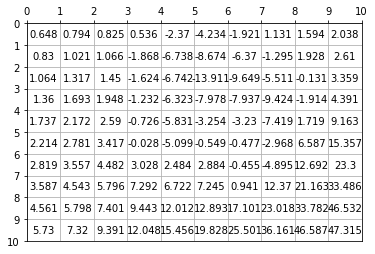

In [296]:
plot_values(orig_reward)

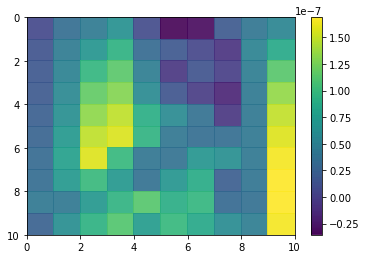

In [297]:
plot_heatmap(best_reward)

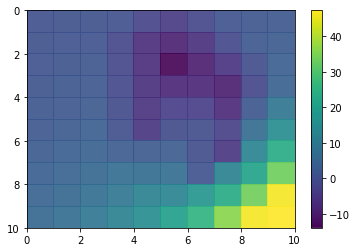

In [298]:
plot_heatmap(orig_reward)

#### Q22


In [299]:
#comparing heatmaps answered in doc

#### Q23


In [300]:
#show best policies

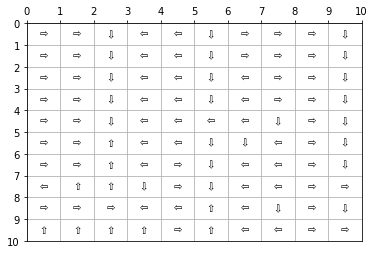

In [301]:
plot_optimal_policy(best_reward)

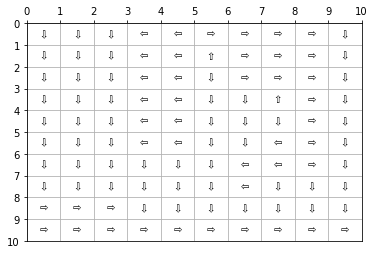

In [302]:
plot_optimal_policy(orig_reward)

#### Q24


In [303]:
#similarities/differences of plots answered in doc

#### Q25


In [ ]:
#answered in doc